In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%notebook inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv("dataset.csv", names=['MQ1', 'MQ2', 'MQ3', 'MQ4', 'MQ5', 'MQ6', 'index'])

In [4]:
df.head()

,MQ1,MQ2,MQ3,MQ4,MQ5,MQ6,index
0,670,696,1252,1720,1321,2431,4
1,641,674,1156,1652,1410,2433,4
2,642,646,1159,1643,1455,2361,4
3,640,590,1105,1608,1459,2427,4
4,616,627,1192,1637,1466,2447,4


In [5]:
df.shape

(1845, 7)

In [6]:
df.isna().sum()

MQ1      0
MQ2      0
MQ3      0
MQ4      0
MQ5      0
MQ6      0
index    0
dtype: int64

In [7]:
df["index"].value_counts()

1    595
4    540
2    515
3    195
Name: index, dtype: int64

In [8]:
sns.set_style("darkgrid")

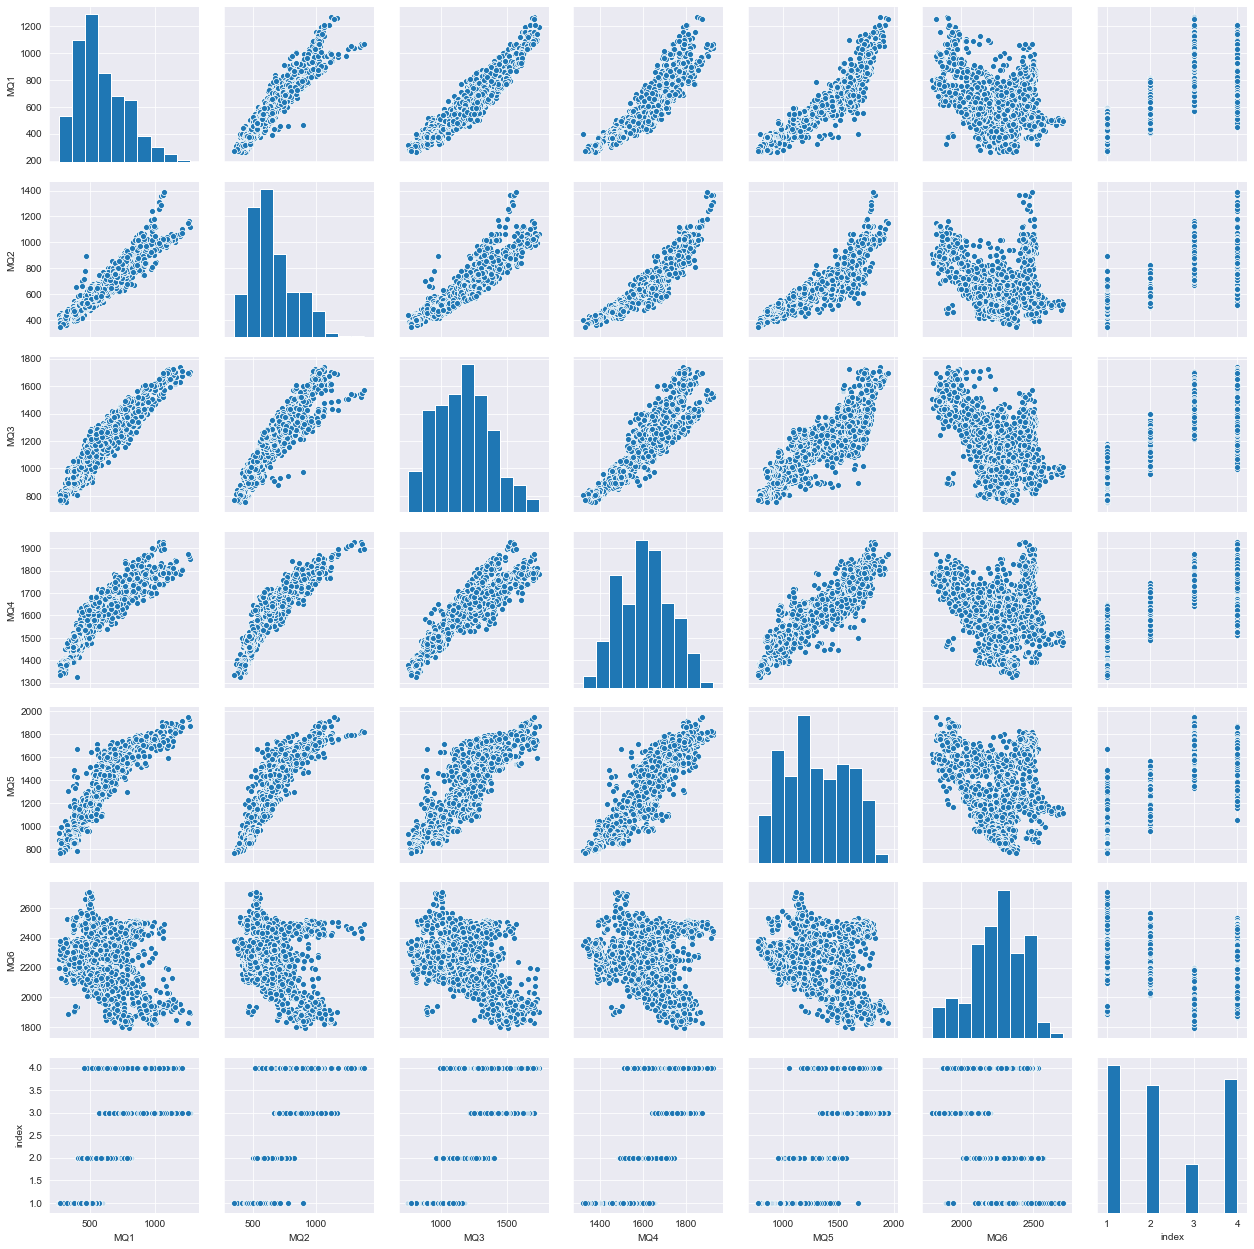

In [9]:
sns.pairplot(df)

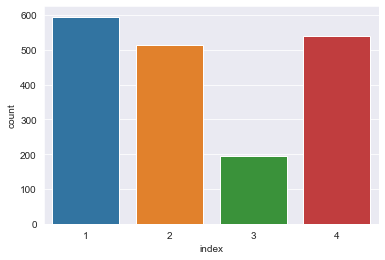

In [10]:
sns.countplot(df["index"])

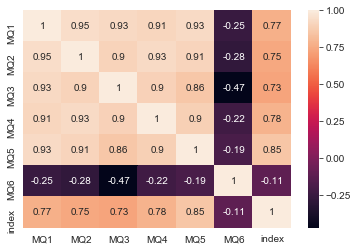

In [11]:
sns.heatmap(df.corr(), annot=True)

In [12]:
sc = StandardScaler()
X = df.drop("index", axis=1)
y = df["index"]

In [13]:
X = sc.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

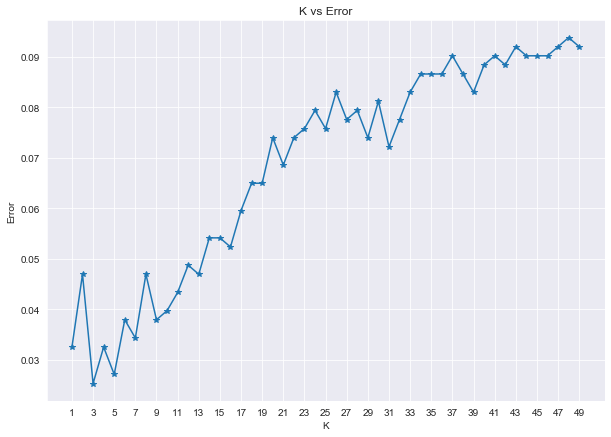

In [15]:
error = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i )
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != y_test))

plt.figure(figsize=(10,7))
plt.xlabel("K")
plt.ylabel("Error")
plt.plot(range(1,50), error, marker = "*")
plt.xticks(range(1,50,2))
plt.title("K vs Error")
plt.show()


In [16]:
models = {
    "                    Logistic Regression": LogisticRegression(),
    "                    K Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "                          Random Forest": RandomForestClassifier(max_depth=5),
    "                         SVM Classifier": SVC()
}

In [19]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                    Logistic Regression trained.
                    K Nearest Neighbors trained.
                          Random Forest trained.
                         SVM Classifier trained.


In [20]:
for name, model in models.items():
    print(name)
    print("--------------------"*3)
    print("Testing Accuracy: {:.5f}".format(model.score(X_test, y_test)))
    print("Training Accuracy: {:.5f}".format(model.score(X_train, y_train)))
    print("--------------------"*3)
    print('\n')
                     

                    Logistic Regression
------------------------------------------------------------
Testing Accuracy: 0.84838
Training Accuracy: 0.84276
------------------------------------------------------------


                    K Nearest Neighbors
------------------------------------------------------------
Testing Accuracy: 0.97473
Training Accuracy: 0.98141
------------------------------------------------------------


                          Random Forest
------------------------------------------------------------
Testing Accuracy: 0.89350
Training Accuracy: 0.91015
------------------------------------------------------------


                         SVM Classifier
------------------------------------------------------------
Testing Accuracy: 0.92599
Training Accuracy: 0.92177
------------------------------------------------------------




In [21]:
def evalModel(name, model):
    print(name)
    print("\nConfusion Matrix")
    predictions = model.predict(X_test)
    print(confusion_matrix(y_test,predictions))
    print("\nClassifiation Report")
    print(classification_report(y_test,predictions))
    print("==="*40)

In [22]:
for name, model in models.items():
    evalModel(name, model)

                    Logistic Regression

Confusion Matrix
[[165  10   0   0]
 [ 16 120   1  20]
 [  0   0  47  11]
 [  0  20   6 138]]

Classifiation Report
              precision    recall  f1-score   support

           1       0.91      0.94      0.93       175
           2       0.80      0.76      0.78       157
           3       0.87      0.81      0.84        58
           4       0.82      0.84      0.83       164

    accuracy                           0.85       554
   macro avg       0.85      0.84      0.84       554
weighted avg       0.85      0.85      0.85       554

                    K Nearest Neighbors

Confusion Matrix
[[174   1   0   0]
 [  1 155   1   0]
 [  0   1  53   4]
 [  1   3   2 158]]

Classifiation Report
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       175
           2       0.97      0.99      0.98       157
           3       0.95      0.91      0.93        58
           4       0.98      0.96 

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
for name, model in models.items():
    print(name,"\n")
    print(cross_val_score(model, X_test, y_test, cv=6))
    print("-----------------------------------------------------")

                    Logistic Regression 

[0.85263158 0.87096774 0.81521739 0.81521739 0.83516484 0.79120879]
-----------------------------------------------------
                    K Nearest Neighbors 

[0.95789474 0.95698925 0.92391304 0.94565217 0.91208791 0.9010989 ]
-----------------------------------------------------
                          Random Forest 

[0.92631579 0.91397849 0.86956522 0.88043478 0.86813187 0.9010989 ]
-----------------------------------------------------
                         SVM Classifier 

[0.90526316 0.92473118 0.88043478 0.89130435 0.89010989 0.93406593]
-----------------------------------------------------
